

## Final Project Submission

Please fill out:
* Student name: Vivian Opondo 
* Student pace: Full time
* Scheduled project review date/time: 12th March 2023
* Instructor name: William Okomba
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!

In [2]:
#importing necessary libraries to use for the project

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sqlite3

![microsoft hollywood](project_images.jpeg)

## Project Title: Movie Analysis for Microsoft
    Author: Vivian Opondo

### Project overview

Recently, there has been a surge in movie production in America, which has captured the attention of Microsoft. As a result, the company has decided to venture into producing its own movies, following the footsteps of its rivals and other companies. However, given that Microsoft lacks experience in movie recording and production, this report aims to analyze relevant data sets related to movie studio creation and provide insights on why the company should take advantage of this opportunity. By examining the provided data sets and presenting compelling visuals that illustrate current market trends in movie production, this analysis aims to persuade stakeholders to support Microsoft's proposal for entering the movie production industry. Ultimately, the report aims to identify the top-performing movies in the box office and highlight the key factors that contribute to their success.







### Business problem

1.Lack of experience in movie production could lead to costly mistakes and setbacks for Microsoft.

2.Microsoft may struggle to compete with established movie production companies with a proven track record of success.

3.The highly competitive nature of the movie industry could make it difficult for Microsoft to differentiate its movies from those of its competitors.

4.It may be challenging for Microsoft to attract a large enough audience to be financially successful in the movie production industry.

5.Entering a new industry, such as movie production, may require significant investments in resources, technology, and talent, which could impact Microsoft's bottom line.

##### IM_DATABASE CLEANING AND MANIPULATION

In [3]:
#loading the im database
conn = sqlite3.connect("im.db")

In [4]:
df2 = pd.read_sql("""
          SELECT *
               FROM movie_ratings;
""", conn)
df2.head()               

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [5]:
df3 = pd.read_sql("""
          SELECT *
               FROM movie_basics;
""", conn)
df3.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


### Joining movie_ratings and movie_basics

In [6]:
df4 = pd.read_sql("""
         SELECT*
         FROM movie_basics AS MB
         JOIN movie_ratings AS MR
            ON MB.movie_id = MR.movie_id
         WHERE averageratinG BETWEEN 7 AND 9
         ORDER BY numvotes DESC
         LIMIT 20;
""", conn)         
df4.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes
0,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",tt1375666,8.8,1841066
1,tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller",tt1345836,8.4,1387769
2,tt0816692,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",tt0816692,8.6,1299334
3,tt1853728,Django Unchained,Django Unchained,2012,165.0,"Drama,Western",tt1853728,8.4,1211405
4,tt0848228,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",tt0848228,8.1,1183655


##### checking for any duplicate vales in the selected dataset

In [7]:
def duplicate_values(item):
    duplicates = []
    for i in item.duplicated():
        duplicates.append(i)
    if len(set(duplicates)) == 1:
        print('there are no duplicate rows')
    else: 
        print('there are {} duplicate rows'.format(item.duplicated.value_counts().sum()))
        
duplicate_values(df4)


there are no duplicate rows


#### checking for any null values in the selected dataset

In [8]:
# determining whether there are any null values

null_values = df4.isna().sum().sum()

if null_values == 0:
    print ('there are {} null values'. format(null_values))
else:
        print ('there are {} null values'. format(null_values))


there are 0 null values


##### determining the more popular genres combinations using value_counts method

In [9]:
sorted_genres = [df4["genres"].value_counts()]
sorted_genres

[Action,Adventure,Sci-Fi       5
 Action,Adventure,Fantasy      2
 Action,Adventure,Comedy       2
 Adventure,Drama,Sci-Fi        2
 Biography,Crime,Drama         1
 Mystery,Thriller              1
 Drama,Sci-Fi,Thriller         1
 Adventure,Family,Fantasy      1
 Action,Thriller               1
 Drama,Mystery,Thriller        1
 Drama,Western                 1
 Adventure,Drama,Fantasy       1
 Adventure,Animation,Comedy    1
 Name: genres, dtype: int64]

when combining the two data sets to form one dataframe, we filtered the highest rated and most voted movies to come up with a combined dataframe(df4) the selected dataframe will be used for visualisations

In [10]:
grouped = df4.groupby("genres")
grouped.get_group("Action,Adventure,Sci-Fi")

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes
0,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",tt1375666,8.8,1841066
4,tt0848228,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",tt0848228,8.1,1183655
9,tt1392170,The Hunger Games,The Hunger Games,2012,142.0,"Action,Adventure,Sci-Fi",tt1392170,7.2,795227
11,tt1392190,Mad Max: Fury Road,Mad Max: Fury Road,2015,120.0,"Action,Adventure,Sci-Fi",tt1392190,8.1,780910
15,tt1300854,Iron Man 3,Iron Man Three,2013,130.0,"Action,Adventure,Sci-Fi",tt1300854,7.2,692794


In [11]:
grouped = df3.groupby("genres")
grouped.get_group("Documentary")

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
12,tt0159369,Cooper and Hemingway: The True Gen,Cooper and Hemingway: The True Gen,2013,180.0,Documentary
14,tt0170651,T.G.M. - osvoboditel,T.G.M. - osvoboditel,2018,60.0,Documentary
24,tt0262218,Akakis mogzauroba,Akakis mogzauroba,2012,44.0,Documentary
25,tt0262759,Seven Jews from My Class,Siedmiu Zydów z mojej klasy,2018,40.0,Documentary
31,tt0285423,Abolição,Abolição,2019,NaN,Documentary
...,...,...,...,...,...,...
146130,tt9915436,Vida em Movimento,Vida em Movimento,2019,70.0,Documentary
146134,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary
146136,tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,Illenau - die Geschichte einer ehemaligen Heil...,2017,84.0,Documentary
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary


#### data visualisation using bar graph

<BarContainer object of 20 artists>

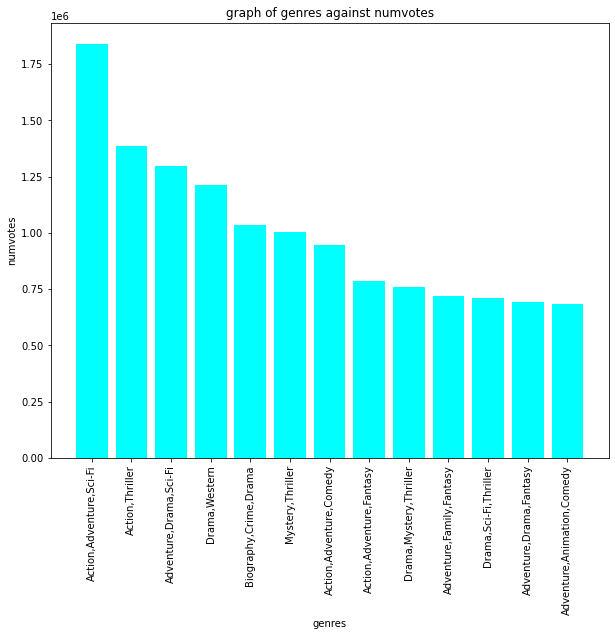

In [12]:
plt.figure(figsize=(10, 8))
x = df4["genres"]
y = df4["numvotes"]
plt.xticks(rotation=90, fontsize=10)
plt.xlabel("genres")
plt.ylabel("numvotes")
plt.title("graph of genres against numvotes")
plt.bar(x,y, color="cyan")

##### DATA CLEANING ON BOM_MOVIES FILE

In [13]:
bom_movies = pd.read_csv("bom.movie_gross.csv")

In [14]:
bom_movies.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [15]:
bom_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [16]:
bom_movies.shape

(3387, 5)

In [17]:
bom_movies.isnull().sum()/len(bom_movies)*100

title              0.000000
studio             0.147623
domestic_gross     0.826690
foreign_gross     39.858282
year               0.000000
dtype: float64

In [18]:
bom_movies.duplicated().value_counts()

False    3387
dtype: int64

In [19]:
bom_movies[bom_movies["foreign_gross"].isnull()]

,title,studio,domestic_gross,foreign_gross,year
222,Flipped,WB,1800000.0,NaN,2010
254,The Polar Express (IMAX re-issue 2010),WB,673000.0,NaN,2010
267,Tiny Furniture,IFC,392000.0,NaN,2010
269,Grease (Sing-a-Long re-issue),Par.,366000.0,NaN,2010
280,Last Train Home,Zeit.,288000.0,NaN,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [21]:
bom_movies.dropna(subset = ['domestic_gross'], axis =0, inplace = True)
bom_movies.drop('foreign_gross', axis=1, inplace= True )
bom_movies.dropna(subset = ['studio'], axis = 0, inplace= True)
bom_movies.isna().sum()

title             0
studio            0
domestic_gross    0
year              0
dtype: int64

In [22]:
bom_movies['year']  = pd.to_datetime(bom_movies['year'])
bom_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3356 entries, 0 to 3386
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   title           3356 non-null   object        
 1   studio          3356 non-null   object        
 2   domestic_gross  3356 non-null   float64       
 3   year            3356 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 131.1+ KB


#### DATA CLEANING FOR TN_MOVIE_BUDGET FILE

In [23]:
#loading the dataframe
tn_movie_budget_df = pd.read_csv("tn.movie_budgets.csv", index_col = 1)

In [24]:
#retrieving first few items of the dataframe
tn_movie_budget_df.head()

,id,movie,production_budget,domestic_gross,worldwide_gross
release_date,,,,,
"Dec 18, 2009",1,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
"May 20, 2011",2,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
"Jun 7, 2019",3,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
"May 1, 2015",4,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
"Dec 15, 2017",5,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [25]:
#checking for null values
tn_movie_budget_df.isnull().sum()

id                   0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [26]:
#checking for any duplicated values
tn_movie_budget_df.duplicated().value_counts()

False    5782
dtype: int64

In [27]:
#checking for information about my dataframe
tn_movie_budget_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5782 entries, Dec 18, 2009 to Aug 5, 2005
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(4)
memory usage: 271.0+ KB


In [28]:
#removing & from numerical values for ease of calculation
tn_movie_budget_df['production_budget'] = tn_movie_budget_df['production_budget'].str.replace('$', "").str.replace(',',"").astype(float)
tn_movie_budget_df['domestic_gross']= tn_movie_budget_df['domestic_gross'].str.replace('$', "").str.replace(',',"").astype(float)
tn_movie_budget_df['worldwide_gross']= tn_movie_budget_df['worldwide_gross'].str.replace('$', "").str.replace(',',"").astype(float)
tn_movie_budget_df.head()

,id,movie,production_budget,domestic_gross,worldwide_gross
release_date,,,,,
"Dec 18, 2009",1,Avatar,425000000.0,760507625.0,2.776345e+09
"May 20, 2011",2,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
"Jun 7, 2019",3,Dark Phoenix,350000000.0,42762350.0,1.497624e+08
"May 1, 2015",4,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
"Dec 15, 2017",5,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


In [29]:
#calculating return on investments
tn_movie_budget_df['return_on_inv'] = ((tn_movie_budget_df['worldwide_gross'] - tn_movie_budget_df['production_budget']) /tn_movie_budget_df['production_budget']).round(2)
tn_movie_budget_df.head()

,id,movie,production_budget,domestic_gross,worldwide_gross,return_on_inv
release_date,,,,,,
"Dec 18, 2009",1,Avatar,425000000.0,760507625.0,2.776345e+09,5.53
"May 20, 2011",2,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,1.55
"Jun 7, 2019",3,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-0.57
"May 1, 2015",4,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,3.24
"Dec 15, 2017",5,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,3.15


In [30]:
#sorting the dataframe according to return on investments
cleaned_budget = tn_movie_budget_df.sort_values(by = 'return_on_inv', ascending= False).head(20)
cleaned_budget

,id,movie,production_budget,domestic_gross,worldwide_gross,return_on_inv
release_date,,,,,,
"Jun 30, 1972",46,Deep Throat,25000.0,45000000.0,45000000.0,1799.00
"Mar 21, 1980",14,Mad Max,200000.0,8750000.0,99750000.0,497.75
"Sep 25, 2009",93,Paranormal Activity,450000.0,107918810.0,194183034.0,430.52
"Jul 10, 2015",80,The Gallows,100000.0,22764410.0,41656474.0,415.56
"Jul 14, 1999",7,The Blair Witch Project,600000.0,140539099.0,248300000.0,412.83
"May 7, 2004",10,Super Size Me,65000.0,11529368.0,22233808.0,341.06
"Aug 13, 1942",47,Bambi,858000.0,102797000.0,268000000.0,311.35
"Feb 26, 1993",74,El Mariachi,7000.0,2040920.0,2041928.0,290.70
"Oct 1, 1968",77,Night of the Living Dead,114000.0,12087064.0,30087064.0,262.92


#### DATA CLEANING FOR TMDB_MOVIES

In [31]:
#loading dataframe
tmdb_movies = pd.read_csv("tmdb.movies.csv", index_col = 0)

In [32]:
#checking for null values
tmdb_movies.isnull().sum()

genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [33]:
#checking for duplicated values
tmdb_movies.duplicated().value_counts()

False    25497
True      1020
dtype: int64

In [34]:
#veiwing the duplicated values
tmdb_movies[tmdb_movies.duplicated(keep = False)].sort_values(by = "title")

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
9191,[99],95383,en,$ellebrity,1.420,2013-01-11,$ellebrity,5.6,12
6315,[99],95383,en,$ellebrity,1.420,2013-01-11,$ellebrity,5.6,12
20070,"[99, 36, 10770]",430364,en,'85: The Greatest Team in Pro Football History,0.600,2018-01-29,'85: The Greatest Team in Pro Football History,7.5,2
26340,"[99, 36, 10770]",430364,en,'85: The Greatest Team in Pro Football History,0.600,2018-01-29,'85: The Greatest Team in Pro Football History,7.5,2
18016,"[18, 10749]",416691,en,1 Night,5.409,2017-02-10,1 Night,6.4,107
...,...,...,...,...,...,...,...,...,...
21273,[18],326382,es,Zama,5.671,2017-09-30,Zama,6.9,50
15061,"[10751, 16]",94196,fr,Zarafa,2.705,2012-11-11,Zarafa,6.8,39
5888,"[10751, 16]",94196,fr,Zarafa,2.705,2012-11-11,Zarafa,6.8,39
25188,"[10752, 10751, 36]",472553,en,Zoo,2.550,2018-06-08,Zoo,6.6,17


In [35]:
#dropping duplicated values and remaining with the first duplicate
tmdb_movies.drop_duplicates(keep = "first", inplace = True)

In [36]:
#checking for any remaining duplicates
tmdb_movies.duplicated().value_counts()

False    25497
dtype: int64

In [37]:
#checking dataframe info
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25497 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          25497 non-null  object 
 1   id                 25497 non-null  int64  
 2   original_language  25497 non-null  object 
 3   original_title     25497 non-null  object 
 4   popularity         25497 non-null  float64
 5   release_date       25497 non-null  object 
 6   title              25497 non-null  object 
 7   vote_average       25497 non-null  float64
 8   vote_count         25497 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 1.9+ MB


In [38]:
#dropping two columns, original_language and original_title
tmdb_movies.drop(["original_language", "original_title"], axis = 1, inplace = True)
tmdb_movies.head()

,genre_ids,id,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,27.920,2010-07-16,Inception,8.3,22186


In [39]:
from datetime import datetime

In [40]:
#changing release_date from object to datetime
tmdb_movies["release_date"] = pd.to_datetime(tmdb_movies["release_date"])
tmdb_movies.dtypes

genre_ids               object
id                       int64
popularity             float64
release_date    datetime64[ns]
title                   object
vote_average           float64
vote_count               int64
dtype: object

#### DATA CLEANING MOVIE INFO TSV FILE

In [41]:
#loading the dataset
rt_movie_info = pd.read_csv("rt.movie_info.tsv", delimiter="\t", encoding='unicode_escape', index_col = 0)

In [42]:
#preview dataset
rt_movie_info.head()

,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
id,,,,,,,,,,,
1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [43]:
rt_movie_info.shape

(1560, 11)

In [44]:
rt_movie_info.isnull().sum()/len(rt_movie_info)*100

synopsis         3.974359
rating           0.192308
genre            0.512821
director        12.756410
writer          28.782051
theater_date    23.012821
dvd_date        23.012821
currency        78.205128
box_office      78.205128
runtime          1.923077
studio          68.333333
dtype: float64

#### DATA CLEANING RT_REVEIWS TSV FILE

In [45]:
#loading the dataset
rt_reviews = pd.read_csv("rt.reviews.tsv", delimiter="\t", encoding='unicode_escape')

In [46]:
#preveiwing the dataset
rt_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [47]:
#checking for null values
rt_reviews.isnull().sum()/len(rt_reviews)*100

id             0.000000
review        10.220091
rating        24.832819
fresh          0.000000
critic         5.000735
top_critic     0.000000
publisher      0.567681
date           0.000000
dtype: float64

In [48]:
#checking for duplicated values
rt_reviews.duplicated().value_counts()

False    54423
True         9
dtype: int64

#### STUDIO ANALYSIS: WHICH ONE GIVES A COMPETATIVE ADVANTAGE?

In quest to give Microsoft a more competitive direction and place them in a more healthy position in this stiff market, I decided to do an analysis on which studio has been having good returns over time and consequently recommend it to them as this will be an assurance to place them in a very healthy position

In [49]:
bom_movies_grouping = bom_movies.groupby('studio')["domestic_gross"].mean()

In [50]:
bom_grouped_by_domestic_gross = pd.DataFrame(bom_movies_grouping)
bom_grouped_by_domestic_gross.head()

,domestic_gross
studio,
3D,6.100000e+06
A23,8.210000e+04
A24,6.616208e+06
ADC,1.241000e+05
AF,3.571500e+05


In [51]:
bom_grouped_by_worldwide_gross = bom_grouped_by_domestic_gross.sort_values(by=['domestic_gross'], ascending=False)
bom_grouped_by_domestic_gross.head(10)

,domestic_gross
studio,
3D,6.100000e+06
A23,8.210000e+04
A24,6.616208e+06
ADC,1.241000e+05
AF,3.571500e+05
AGF,1.580000e+04
ALP,2.800000e+03
AM,2.370000e+05
AR,3.500000e+05


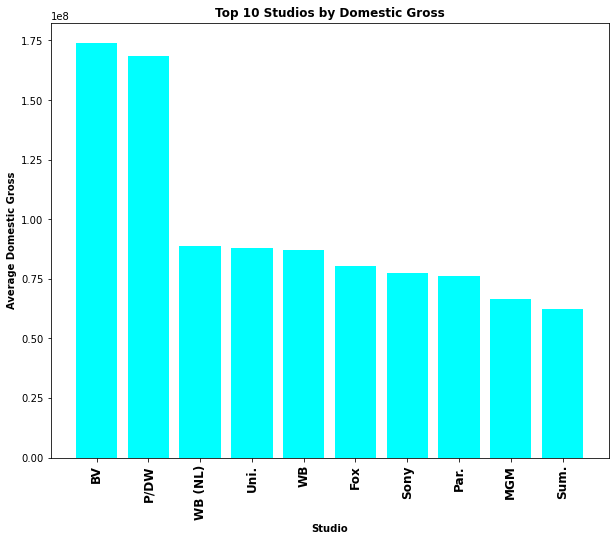

In [52]:

# Group movies by studio and calculate their average domestic gross
bom_movies_grouping = bom_movies.groupby("studio")["domestic_gross"].mean()

# Sort the groups by ascending domestic gross
bom_movies_grouping = bom_movies_grouping.sort_values(ascending=False)

# Get the top 10 studios by domestic gross
top_studios = bom_movies_grouping.head(10)

# Create a bar plot of the top 10 studios by domestic gross
plt.bar(top_studios.index, top_studios.values, color="cyan", width = 0.8)
plt.xticks(rotation=90, fontsize = 12, fontweight = "bold")
plt.xlabel("Studio", fontweight = "bold")
plt.ylabel("Average Domestic Gross", fontweight = "bold")
plt.title("Top 10 Studios by Domestic Gross", fontweight = "bold")
plt.gcf().set_size_inches(10,8)
plt.show()

#### RECOMMENDATIONS

From the analysis above, I would highly recommend tha Microsoft settles with BV studio as it has higher average returns, very popular and spans a wider audience therefore it will give them a competirirve advantage in the market. 

#### ANALYSING COST OF PRODUCTION VS ROI

In [53]:
#here, we drop the first row containing deep throat movie as its an outlier in our data.
cleaned_budget = tn_movie_budget_df.sort_values(by = 'return_on_inv', ascending= False).head(20).iloc[1:20]
cleaned_budget.head()

,id,movie,production_budget,domestic_gross,worldwide_gross,return_on_inv
release_date,,,,,,
"Mar 21, 1980",14,Mad Max,200000.0,8750000.0,99750000.0,497.75
"Sep 25, 2009",93,Paranormal Activity,450000.0,107918810.0,194183034.0,430.52
"Jul 10, 2015",80,The Gallows,100000.0,22764410.0,41656474.0,415.56
"Jul 14, 1999",7,The Blair Witch Project,600000.0,140539099.0,248300000.0,412.83
"May 7, 2004",10,Super Size Me,65000.0,11529368.0,22233808.0,341.06


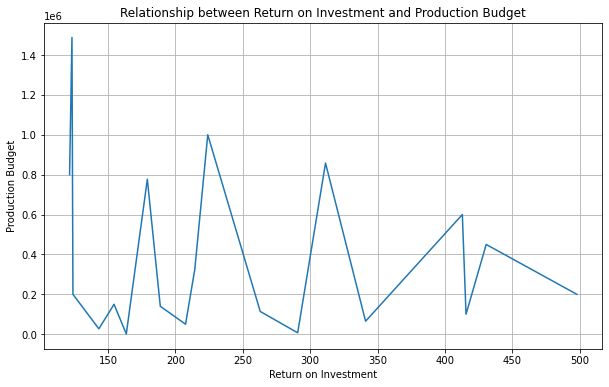

In [54]:
#establishing the relationship between the production cost and the returns gained from the investments

plt.figure(figsize=(10, 6))

# Plot the lineplot
sns.lineplot(x='return_on_inv', y='production_budget', data=cleaned_budget)

# Add labels and title
plt.xlabel('Return on Investment')
plt.ylabel('Production Budget')
plt.title('Relationship between Return on Investment and Production Budget')
plt.grid()
plt.show()

#### 

from the graph above, we can clearly see that there's no clear relationship between the return investments and production budget. We can therefore deduce that injecting more resources into into production does not guarantee higher returns. Therefore, other factors like movie genre should be considered when trying to predict returns.

#### ANALYSIS TO DETERMINE THE MOST POPULAR GENRE COMBINATION

In [55]:
df4

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes
0,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",tt1375666,8.8,1841066
1,tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller",tt1345836,8.4,1387769
2,tt0816692,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",tt0816692,8.6,1299334
3,tt1853728,Django Unchained,Django Unchained,2012,165.0,"Drama,Western",tt1853728,8.4,1211405
4,tt0848228,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",tt0848228,8.1,1183655
5,tt0993846,The Wolf of Wall Street,The Wolf of Wall Street,2013,180.0,"Biography,Crime,Drama",tt0993846,8.2,1035358
6,tt1130884,Shutter Island,Shutter Island,2010,138.0,"Mystery,Thriller",tt1130884,8.1,1005960
7,tt2015381,Guardians of the Galaxy,Guardians of the Galaxy,2014,121.0,"Action,Adventure,Comedy",tt2015381,8.1,948394
8,tt1431045,Deadpool,Deadpool,2016,108.0,"Action,Adventure,Comedy",tt1431045,8.0,820847
9,tt1392170,The Hunger Games,The Hunger Games,2012,142.0,"Action,Adventure,Sci-Fi",tt1392170,7.2,795227


In [56]:
#converting the SQL file into a dataframe, grouping by genres, calculating the mean of the numvotes then soring in descending order.
genres_sorted_mean = pd.DataFrame(df4.groupby("genres")["numvotes"].mean()).sort_values(by="numvotes", ascending= False)
genres_sorted_mean

,numvotes
genres,
"Action,Thriller",1387769.0
"Drama,Western",1211405.0
"Action,Adventure,Sci-Fi",1058730.4
"Biography,Crime,Drama",1035358.0
"Mystery,Thriller",1005960.0
"Adventure,Drama,Sci-Fi",989725.0
"Action,Adventure,Comedy",884620.5
"Drama,Mystery,Thriller",761592.0
"Action,Adventure,Fantasy",734022.0


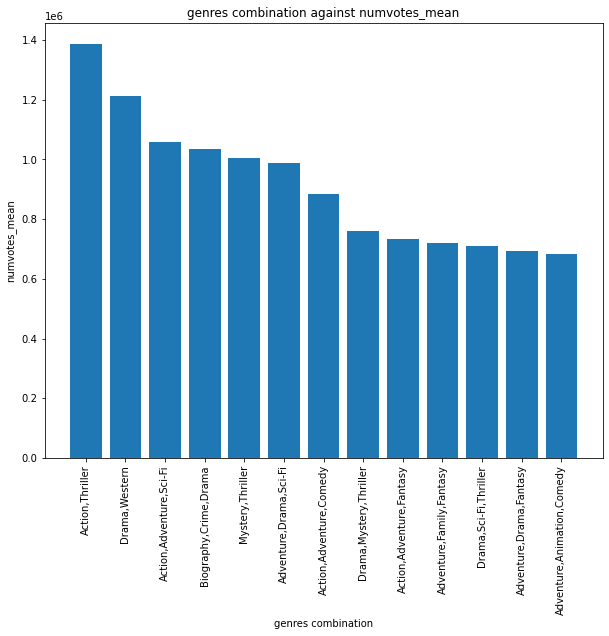

In [57]:
#using a bar graph to establish the relationship between genres and numvotes
plt.figure(figsize=(10, 8))
plt.xticks(rotation=90, fontsize=10)
y = genres_sorted_mean["numvotes"]
plt.xlabel("genres combination")
plt.ylabel("numvotes_mean")
plt.title("genres combination against numvotes_mean")
plt.bar(y.index, y.values);

#### ANALYSING THE BEST MOVIE DIRECTOR

As we can see, there are several movie directors. In order to settle on which director to work with, it is iportant that we screen through the work they have done as well as their rating over time. 

In [58]:
directorsName = pd.read_sql("""
      SELECT DISTINCT primary_name, COUNT(primary_name), AVG(averagerating)
      FROM directors
      JOIN persons ON directors.person_id = persons.person_id
      JOIN movie_basics ON movie_basics.movie_id = directors.movie_id
      JOIN movie_ratings ON movie_ratings.movie_id = movie_basics.movie_id
      GROUP BY primary_name
      HAVING AVG(averagerating) > 8 AND COUNT(primary_name) > 15
      ORDER BY AVG(averagerating) DESC;     
              """,conn)

In [59]:
directors_df = pd.DataFrame(directorsName)
directors_df.head()

,primary_name,COUNT(primary_name),AVG(averagerating)
0,Sylvia Broeckx,28,9.000000
1,Lisa Gossels,17,9.000000
2,Erin Korbylo,28,9.000000
3,Dennis Korbylo,28,9.000000
4,Anthony Russo,30,8.246667


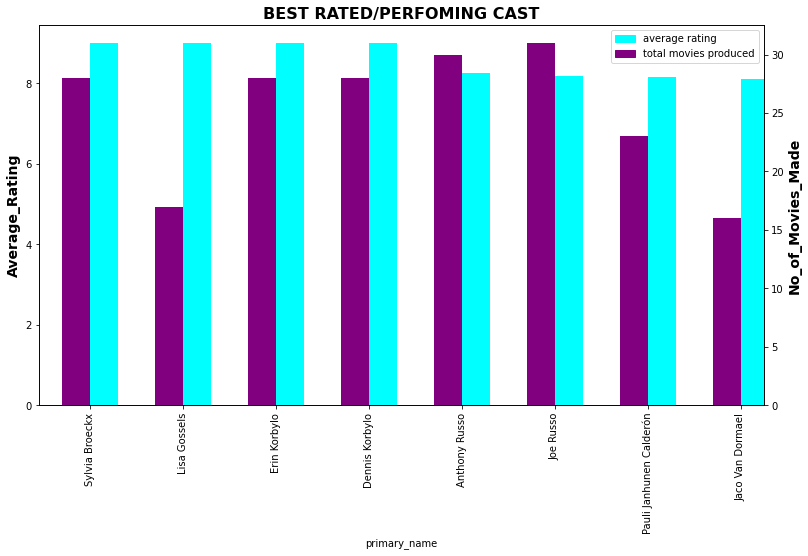

In [60]:
import matplotlib.patches as mpatches

fig = plt.figure(figsize=(13,7))
ax = fig.add_subplot(111)
ax2 = ax.twinx()
width = .3
directors = directors_df.set_index("primary_name")
plt.xticks(rotation=75, fontsize=10, fontweight= 'bold')
plt.title('BEST RATED/PERFOMING CAST', fontsize=16, fontweight='bold')
ax.set_ylabel('Average_Rating', fontsize=14, fontweight='bold')
ax2.set_ylabel('No_of_Movies_Made', fontsize=14, fontweight='bold')


directors['AVG(averagerating)'].plot(kind='bar',color='cyan',ax=ax,width=width, position=0)
directors['COUNT(primary_name)'].plot(kind='bar',color='purple', ax=ax2,width = width, position=1)


# Add the legend
cyan_patch = mpatches.Patch(color='cyan', label='average rating')
purple_patch = mpatches.Patch(color='purple', label='total movies produced')
plt.legend(handles=[cyan_patch, purple_patch])

plt.show();